# Preparation Functions

### Imports

In [17]:
from sklearn.datasets import fetch_kddcup99
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Data Cleaning

In [27]:
def cleaning_data():
    # Get Data
    X, y= fetch_kddcup99(percent10=True, random_state=42, as_frame=True, return_X_y=True)
    
    # Remove "normal" from the dataset
    X = X[y != b'normal.']
    y = y[y != b'normal.']

    #Encodd the following fields
    le = LabelEncoder()
    X["protocol_type"] = le.fit_transform(X["protocol_type"])
    X["service"] = le.fit_transform(X["service"])
    X["flag"] = le.fit_transform(X["flag"])
    X["duration"] = le.fit_transform(X["duration"])
    X["src_bytes"] = le.fit_transform(X["src_bytes"])
    X["dst_bytes"] = le.fit_transform(X["dst_bytes"])
    X["land"] = le.fit_transform(X["land"])
    X["wrong_fragment"] = le.fit_transform(X["wrong_fragment"])
    X["urgent"] = le.fit_transform(X["urgent"])
    X["hot"] = le.fit_transform(X["hot"])
    X["num_failed_logins"] = le.fit_transform(X["num_failed_logins"])
    X["logged_in"] = le.fit_transform(X["logged_in"])
    X["num_compromised"] = le.fit_transform(X["num_compromised"])
    X["root_shell"] = le.fit_transform(X["root_shell"])
    X["su_attempted"] = le.fit_transform(X["su_attempted"])
    X["num_root"] = le.fit_transform(X["num_root"])
    X["num_file_creations"] = le.fit_transform(X["num_file_creations"])
    X["num_shells"] = le.fit_transform(X["num_shells"])
    X["num_access_files"] = le.fit_transform(X["num_access_files"])
    X["num_outbound_cmds"] = le.fit_transform(X["num_outbound_cmds"])
    X["is_host_login"] = le.fit_transform(X["is_host_login"])
    X["is_guest_login"] = le.fit_transform(X["is_guest_login"])
    X["count"] = le.fit_transform(X["count"])
    X["srv_count"] = le.fit_transform(X["srv_count"])
    X["serror_rate"] = le.fit_transform(X["serror_rate"])
    X["srv_serror_rate"] = le.fit_transform(X["srv_serror_rate"])
    X["rerror_rate"] = le.fit_transform(X["rerror_rate"])
    X["srv_rerror_rate"] = le.fit_transform(X["srv_rerror_rate"])
    X["same_srv_rate"] = le.fit_transform(X["same_srv_rate"])
    X["diff_srv_rate"] = le.fit_transform(X["diff_srv_rate"])
    X["srv_diff_host_rate"] = le.fit_transform(X["srv_diff_host_rate"])
    X["dst_host_count"] = le.fit_transform(X["dst_host_count"])
    X["dst_host_srv_count"] = le.fit_transform(X["dst_host_srv_count"])
    X["dst_host_same_srv_rate"] = le.fit_transform(X["dst_host_same_srv_rate"])
    X["dst_host_diff_srv_rate"] = le.fit_transform(X["dst_host_diff_srv_rate"])
    X["dst_host_same_src_port_rate"] = le.fit_transform(X["dst_host_same_src_port_rate"])
    X["dst_host_srv_diff_host_rate"] = le.fit_transform(X["dst_host_srv_diff_host_rate"])
    X["dst_host_serror_rate"] = le.fit_transform(X["dst_host_serror_rate"])
    X["dst_host_srv_serror_rate"] = le.fit_transform(X["dst_host_srv_serror_rate"])
    X["dst_host_rerror_rate"] = le.fit_transform(X["dst_host_rerror_rate"])
    X["dst_host_srv_rerror_rate"] = le.fit_transform(X["dst_host_srv_rerror_rate"])
    
    #y = np.where(((y == b'nmap.') | (y==b'ipsweep.') | (y==b'portsweep.') | (y==b'satan.')), 1, 0)
    y = np.where(((y== b'smurf.') | (y==b'teardrop.') | (y== b'back.') | (y== b'land.') | (y== b'neptune.') | (y== b'pod.')), 1, 0)

    return X,y
    

### Graph Functions

In [3]:

def accuracy_graph(accuracy_labels,accuracy_values, title=None):
    fig,ax = plt.subplots()
    #accuracy_labels = ['No Regularization', 'L1', 'L2']
    #accuracy_values = [0.99, 0.8, 0.5]
    bar_container = ax.bar(accuracy_labels, accuracy_values)
    ax.bar_label(bar_container, fmt='{:,.9f}')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xlabel('Regression Type')
    plt.show()

def accuracy_graph2(accuracy_labels,accuracy_values,title):
    fig,ax = plt.subplots()
    #accuracy_labels = ['No Regularization', 'L1', 'L2']
    #accuracy_values = [0.99, 0.8, 0.5]
    bar_container = ax.bar(accuracy_labels, accuracy_values)
    ax.bar_label(bar_container, fmt='{:,.4f}')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xlabel('C values')
    plt.show()

def weight_graph(labels, values, xliml, xlimr, title=None):
    fig,ax = plt.subplots()
    bar_container = ax.barh(labels, values)
    ax.bar_label(bar_container, fmt='{:,.3f}')
    ax.set_xlabel('Weights')
    ax.set_title(title)
    ax.set_ylabel('Features')
    ax.set_xlim(left=xliml, right=xlimr)
    plt.show()

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    print('Plotting graph...')

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

### Prep Data for Graphing

In [4]:
def find_weights(weights, features, title, xliml=--5, xlimr=5):
    n_weight = [] #will store the absolute value of each value in weights
    
    for i in weights:
        #taking each coef_[0] value and getting the absolute
        #The abs val is then appended to n_weight
        n_weight.append(abs(i))

    #creating a DataFram to store values
    data = pd.DataFrame({'Original weights': weights, 'Absolute Weights': n_weight, 'features':features})
    
    data = data.sort_values(by=['Absolute Weights'], ascending=False)
    temp = data[:15]
    weight_graph(temp['features'], temp['Original weights'], xliml, xlimr, title)
    print(f'{temp}\n\n-----------------------------------------------------------\n')

### Feature Scaling

In [5]:
def feature_scaling(X_train, X_test):
    #Feature scaling for optimiztion: gradient descent implementation
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std, X_test_std

### Logistic Functions

In [18]:
def SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, graph_type=0, kernel_type='linear'):
    #svm = SGDClassifier(loss='hinge')

    svm = SVC(
            random_state=1,
            max_iter= 1000,
            kernel=kernel_type,
            C=1.0
        )

    svm.fit(X_train_std, y_train)
    labels = []
    accuracy = []
    
    #training accuracy
    y_hat = svm.predict(X_train[:])
    accuracy.append(accuracy_score(y_train[:], y_hat))
    labels.append("Train")
    #coeff = sv.coef_[0]

    #test accuracy
    y_hat = svm.predict(X_test[:])
    accuracy.append(accuracy_score(y_test[:], y_hat))
    labels.append("Test")

    iterations = svm.n_iter_
    print(f'iterations to Converge: {iterations}')
    print(f'Difference in Accuracy: {accuracy[0] - accuracy[1]}')
    #accuracy_graph(labels,accuracy)

    if graph_type == 0:
        return labels, accuracy
    else:
        return accuracy[0], accuracy[1]


In [6]:
def logr(X_train, X_test, y_train, y_test, X_train_std, X_test_std, solver_type='lbfgs'):
    lr = LogisticRegression(
        random_state=1,
        max_iter= 1000,
        solver=solver_type,
        multi_class='ovr',
        penalty=None
    )
    lr.fit(X_train_std, y_train)

    labels = []
    accuracy = []
    
    #training accuracy
    y_hat = lr.predict(X_train[:])
    accuracy.append(accuracy_score(y_train[:], y_hat))
    labels.append("Train")
    coeff = lr.coef_[0]

    #test accuracy
    y_hat = lr.predict(X_test[:])
    accuracy.append(accuracy_score(y_test[:], y_hat))
    labels.append("Test")

    iterations = lr.n_iter_
    print(f'iterations to Converge: {iterations}')
    print(f'Difference in Accuracy: {accuracy[0] - accuracy[1]}')
    accuracy_graph(labels,accuracy)
    
    find_weights(coeff, X_train.columns, "Non-Regularized Top 15 Weights", xliml=-75, xlimr=75)


In [7]:
def logr1(X_train, X_test, y_train, y_test, X_train_std, X_test_std, c_val=1.0, solver_type='saga'):

    labels = []
    accuracy = []
    lr = LogisticRegression(
        C=c_val,
        random_state=1,
        max_iter= 1000,
        solver=solver_type,
        multi_class='ovr',
        penalty='l1'
        )

    lr.fit(X_train_std, y_train)
    
    #training accuracy
    y_hat = lr.predict(X_train[:])
    accuracy.append(accuracy_score(y_train[:], y_hat))
    labels.append("Train L1")
    coeff = lr.coef_[0]
    

    #Test accuracy
    y_hat = lr.predict(X_test[:])
    accuracy.append(accuracy_score(y_test[:], y_hat))
    labels.append("Test L1")

    return accuracy, labels, coeff
    #accuracy_graph(labels,accuracy, title)
    #print(accuracy[0] - accuracy[1])
    #if i == 1.0:
    #   find_weights(lr.coef_[0], X_train.columns,"L1 Top 15 Weights", -7, 7)

In [8]:
def logr2(X_train, X_test, y_train, y_test, X_train_std, X_test_std, c_val=1.0, solver_type='saga'):
    labels = []
    accuracy = []
    lr = LogisticRegression(
        C=c_val,
        max_iter= 1000,
        random_state=1,
        solver=solver_type,
        multi_class='ovr',
        penalty='l2'
        )

    lr.fit(X_train_std, y_train)
    
    #training accuracy
    y_hat = lr.predict(X_train[:])
    accuracy.append(accuracy_score(y_train[:], y_hat))
    labels.append("Train L2")
    coeff = lr.coef_[0]
    

    #Test accuracy
    y_hat = lr.predict(X_test[:])
    accuracy.append(accuracy_score(y_test[:], y_hat))
    labels.append("Test L2")

    return accuracy, labels, coeff

# Main Code

## Differnet Undersampling aproaches

### Undersampling X Y Data

In [24]:
def RUS_method_1():
    
    # Function to clean data
    X, y = cleaning_data()
    
    # Random Under Sampling
    sampling_string = 'majority'
    rus = RandomUnderSampler(sampling_strategy=sampling_string, random_state=42)
    X_resample, y_resample = rus.fit_resample(X, y)
    
    # Splitting data into 80% training and 20% test data:
    X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42, stratify=y_resample)

    
    X_train_std, X_test_std = feature_scaling(X_train, X_test)
    
    return X_train, X_test, y_train, y_test, X_train_std, X_test_std

### Undersampling X_train Data

In [10]:
def RUS_method_2():

    # Function to clean data
    X, y = cleaning_data()
    
    # Random Under Sampling
    sampling_string = 'majority'
    rus = RandomUnderSampler(sampling_strategy=sampling_string, random_state=42)
    
    # Splitting data into 80% training and 20% test data:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_resample, y_resample = rus.fit_resample(X_train, y_train)
    X_train_std, X_test_std = feature_scaling(X_resample, X_test)
    
    return X_resample, X_test, y_resample, y_test, X_train_std, X_test_std

# Results Random Undersampling on with the "majority" attribute for X and y

## Non-Regularization Results are for the Following Configruations


**Current Configuration** lbfgs Solver

**Iterations to converge:** 40.

There was approximately a 0.004285247890386867 difference between training and test pediction accuracys.
- **Training Accuracy:** 0.796688580
- **Test Accuracy:** 0.80097382

Since the test data has a higher accuracy rate than the training data, this modeling implementation is not overfitting. If it were overfitting, the training data would have performed much better than the test data.

**Weight Results**
When looking at the data in kddcup99_csv.csv, there is very little variance in the features listed above. For example, dst_host_diff_srv_rate values range from 0.00 to approximately 1. While other features have much larger ranges.

iterations to Converge: [32]
Difference in Accuracy: 0.001419110690633829


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


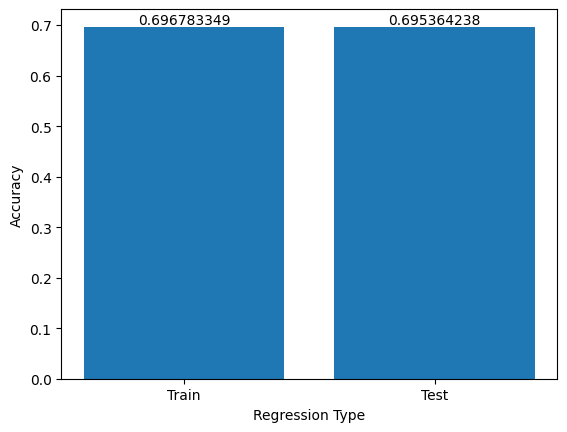

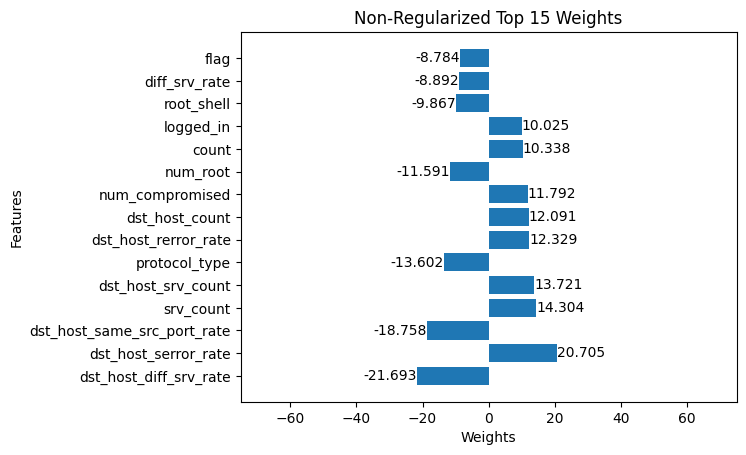

    Original weights  Absolute Weights                     features
34        -21.692625         21.692625       dst_host_diff_srv_rate
37         20.705340         20.705340         dst_host_serror_rate
35        -18.757567         18.757567  dst_host_same_src_port_rate
23         14.304334         14.304334                    srv_count
32         13.721305         13.721305           dst_host_srv_count
1         -13.602403         13.602403                protocol_type
39         12.328872         12.328872         dst_host_rerror_rate
31         12.091018         12.091018               dst_host_count
12         11.792466         11.792466              num_compromised
15        -11.590662         11.590662                     num_root
22         10.337802         10.337802                        count
11         10.024641         10.024641                    logged_in
13         -9.866861          9.866861                   root_shell
29         -8.891728          8.891728          

C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


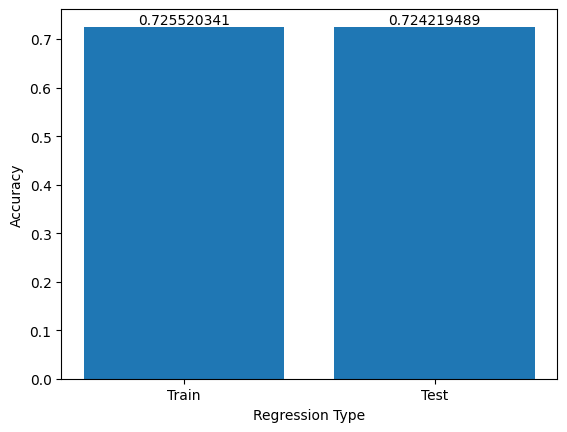

In [28]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std = RUS_method_1()
logr(X_train, X_test, y_train, y_test, X_train_std, X_test_std)
print("----------------------------------------------------------------")
labels,accuracy = SVC_Model(X_train, X_test, y_train, y_test, X_train_std, X_test_std, kernel_type='linear')
print(accuracy)
accuracy_graph(labels,accuracy)

## Comparing L1 and L2

**Current Configuration**
1. Random Undersampling on with the "majority" attribute for X and y
2. liblinear Solver
3. C value default: 1.0

In this scenario, L1 performed better than L2 by ~00.26

C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


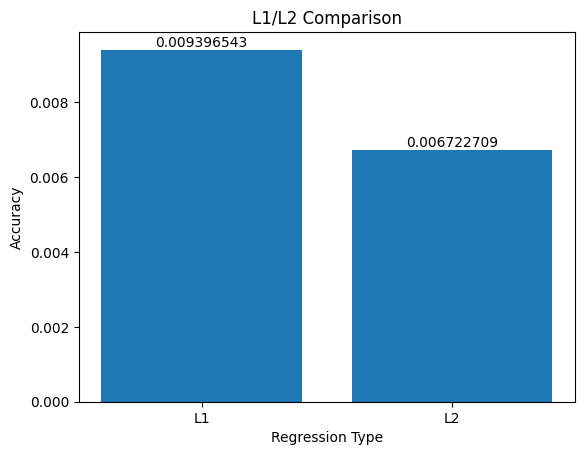

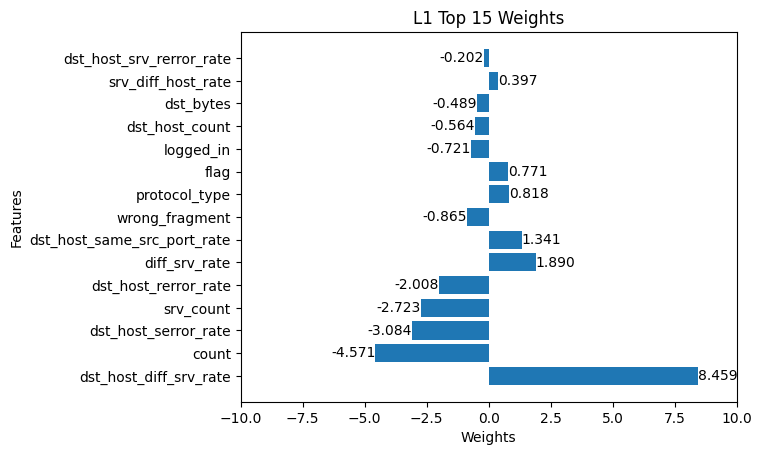

    Original weights  Absolute Weights                     features
34          8.459176          8.459176       dst_host_diff_srv_rate
22         -4.570958          4.570958                        count
37         -3.084460          3.084460         dst_host_serror_rate
23         -2.723474          2.723474                    srv_count
39         -2.008458          2.008458         dst_host_rerror_rate
29          1.889691          1.889691                diff_srv_rate
35          1.340789          1.340789  dst_host_same_src_port_rate
7          -0.864820          0.864820               wrong_fragment
1           0.818194          0.818194                protocol_type
3           0.771178          0.771178                         flag
11         -0.720975          0.720975                    logged_in
31         -0.564492          0.564492               dst_host_count
5          -0.489122          0.489122                    dst_bytes
30          0.397013          0.397013          

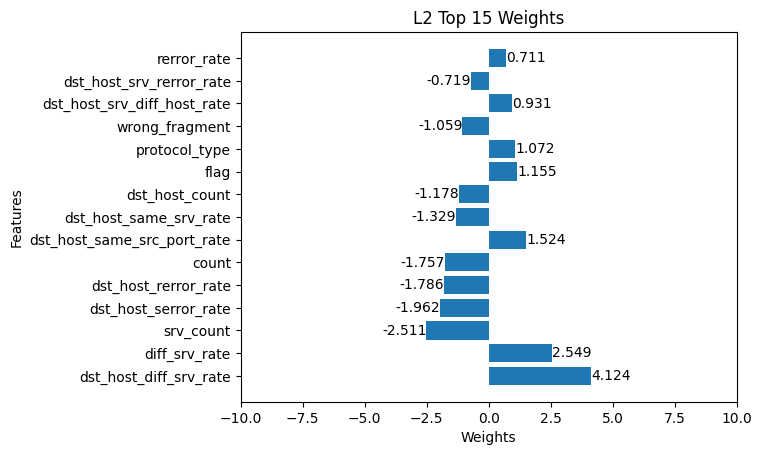

    Original weights  Absolute Weights                     features
34          4.123953          4.123953       dst_host_diff_srv_rate
29          2.549351          2.549351                diff_srv_rate
23         -2.510911          2.510911                    srv_count
37         -1.962352          1.962352         dst_host_serror_rate
39         -1.786023          1.786023         dst_host_rerror_rate
22         -1.756769          1.756769                        count
35          1.523576          1.523576  dst_host_same_src_port_rate
33         -1.328785          1.328785       dst_host_same_srv_rate
31         -1.178446          1.178446               dst_host_count
3           1.155315          1.155315                         flag
1           1.072313          1.072313                protocol_type
7          -1.059259          1.059259               wrong_fragment
36          0.930933          0.930933  dst_host_srv_diff_host_rate
40         -0.719334          0.719334     dst_h

In [12]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std = RUS_method_1()
accuracy1, labels1, coeff1 = logr1(X_train, X_test, y_train, y_test, X_train_std, X_test_std, solver_type='liblinear')
accuracy2, labels2, coeff2 = logr2(X_train, X_test, y_train, y_test, X_train_std, X_test_std, solver_type='liblinear')

accuracy = []
accuracy.append(accuracy1[1]-accuracy1[0])
accuracy.append(accuracy2[1]-accuracy2[0])

labels = ["L1", "L2"]
accuracy_graph(labels,accuracy, "L1/L2 Comparison")

find_weights(coeff1, X_train.columns,"L1 Top 15 Weights", -10, 10)
find_weights(coeff2, X_train.columns,"L2 Top 15 Weights", -10, 10)

## Comparing L2 Regularization Strengths an L2

**Current Configuration**
1. Random Undersampling on with the "majority" attribute for X and y
2. liblinear Solver
3. C value ranges from 0.001 to 100

**Training Results**
As the value of C increased from 0.001 to 1, the accuracy of the model gradually increased from 0.6629 to 0.7729. The accuracy of the model began to gradually decrease once C > 1. This is because L2 heavily relies on weights. As we increase the value of C, it has more of an impact on our results (for better and for worse).

**Testing Results**
As the value of C increased from 0.001 to 1, the accuracy of the model gradually increased from ~0.6592 to 0.797. The accuracy of the model began to gradually decrease once C > 1. This is because L2 heavily relies on weights. As we increase the value of C, it has more of an impact on our results (for better and for worse).

C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


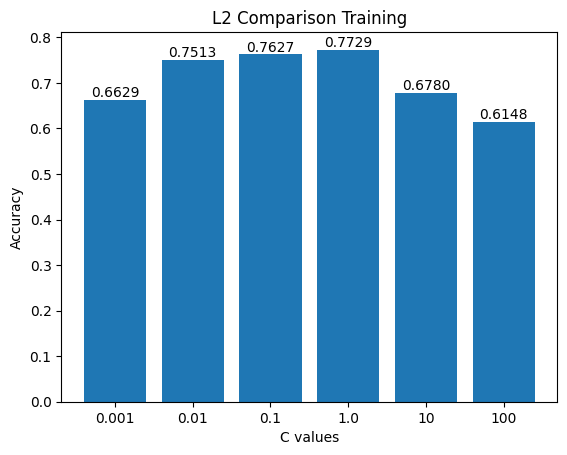

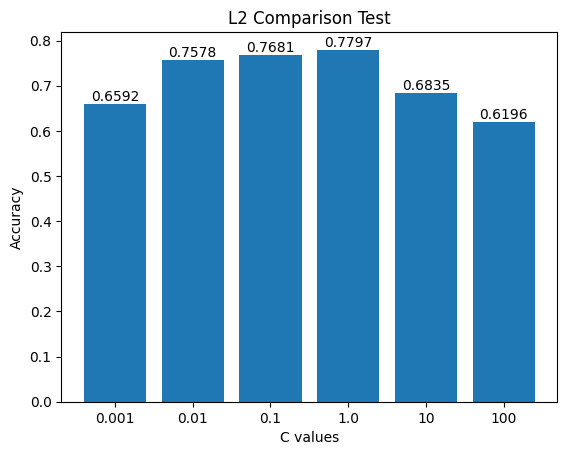

In [13]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std = RUS_method_1()


c = [0.001, 0.01, 0.1, 1.0, 10, 100] 
L2_data = [] # training values
L2_data1 = [] # test values
L2_labels = []
for i in c:
    labels = []
    accuracy = []
    c_val = i
    labels = f"{c_val}"

    accuracy2, labels2, coeff2 = logr2(X_train, X_test, y_train, y_test, X_train_std, X_test_std, c_val, solver_type='liblinear')
    L2_data.append(accuracy2[0])
    L2_data1.append(accuracy2[1])
    L2_labels.append(labels)

accuracy_graph2(L2_labels, L2_data, 'L2 Comparison Training')
accuracy_graph2(L2_labels, L2_data1, 'L2 Comparison Test')

# Results Random Undersampling on with the "majority" attribute for X_train

## Non-Regularization Results are for the Following Configruations

**Current Configuration** lbfgs Solver

**Iterations to converge:** 37.

There was approximately a 0.3223419387652905 difference between training and test pediction accuracys.
- **Training Accuracy:** 0.66905051
- **Test Accuracy:** 0.991392456

Since the test data has a higher accuracy rate than the training data, this modeling implementation is not overfitting. If it were overfitting, the training data would have performed much better than the test data.

**Weight Results**
When looking at the data in kddcup99_csv.csv, there is very little variance in the features listed above. For example, dst_host_diff_srv_rate values range from 0.00 to approximately 1. While other features have much larger ranges.

iterations to Converge: [37]
Difference in Accuracy: -0.3223419387652905


C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


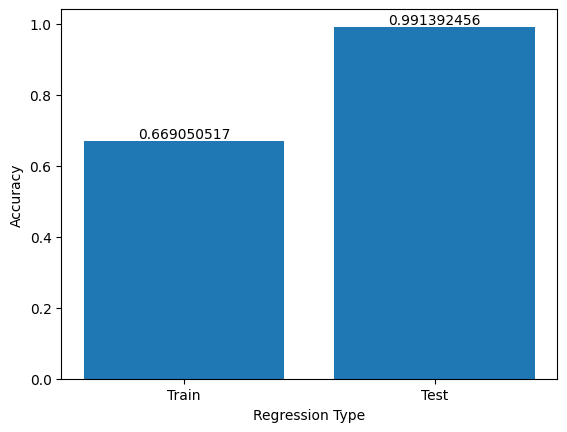

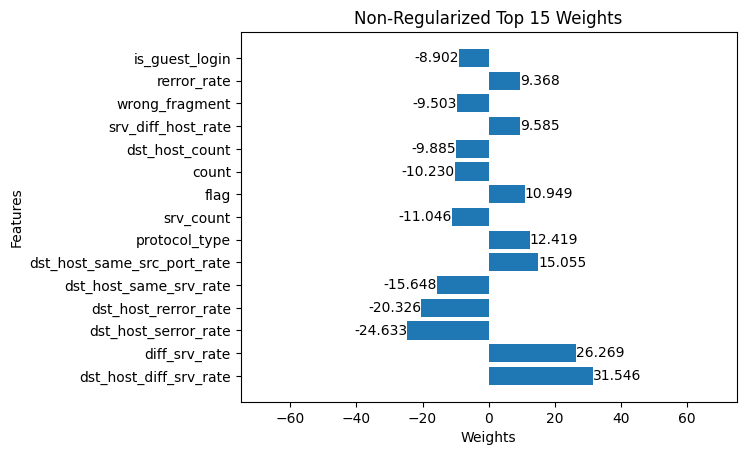

    Original weights  Absolute Weights                     features
34         31.546317         31.546317       dst_host_diff_srv_rate
29         26.268596         26.268596                diff_srv_rate
37        -24.632591         24.632591         dst_host_serror_rate
39        -20.325829         20.325829         dst_host_rerror_rate
33        -15.647651         15.647651       dst_host_same_srv_rate
35         15.054964         15.054964  dst_host_same_src_port_rate
1          12.418654         12.418654                protocol_type
23        -11.046060         11.046060                    srv_count
3          10.949142         10.949142                         flag
22        -10.229545         10.229545                        count
31         -9.885236          9.885236               dst_host_count
30          9.585153          9.585153           srv_diff_host_rate
7          -9.503163          9.503163               wrong_fragment
26          9.367676          9.367676          

In [14]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std = RUS_method_2()
logr(X_train, X_test, y_train, y_test, X_train_std, X_test_std)

## Comparing L1 and L2

**Current Configuration**
1. Random Undersampling on with the "majority" attribute for X and y
2. liblinear Solver
3. C value default: 1

In this scenario, L1 performed better than L2

C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


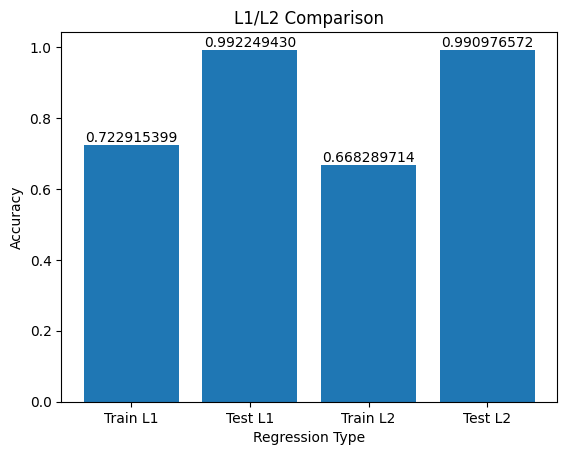

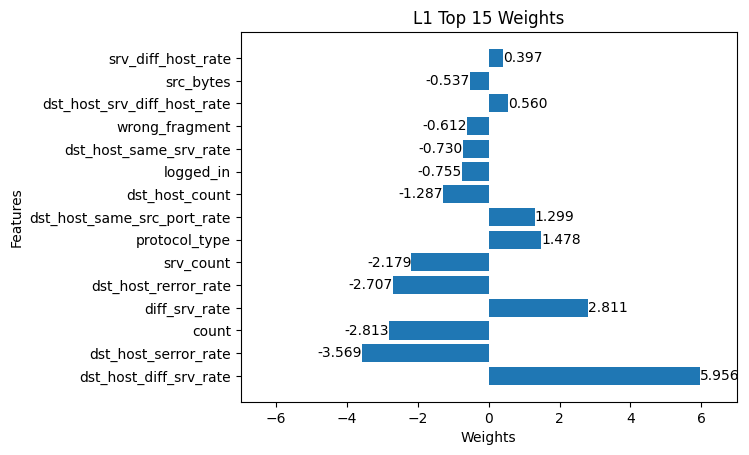

    Original weights  Absolute Weights                     features
34          5.955724          5.955724       dst_host_diff_srv_rate
37         -3.569317          3.569317         dst_host_serror_rate
22         -2.812862          2.812862                        count
29          2.811096          2.811096                diff_srv_rate
39         -2.707175          2.707175         dst_host_rerror_rate
23         -2.178505          2.178505                    srv_count
1           1.478086          1.478086                protocol_type
35          1.298804          1.298804  dst_host_same_src_port_rate
31         -1.286769          1.286769               dst_host_count
11         -0.754639          0.754639                    logged_in
33         -0.729910          0.729910       dst_host_same_srv_rate
7          -0.611810          0.611810               wrong_fragment
36          0.559781          0.559781  dst_host_srv_diff_host_rate
4          -0.536721          0.536721          

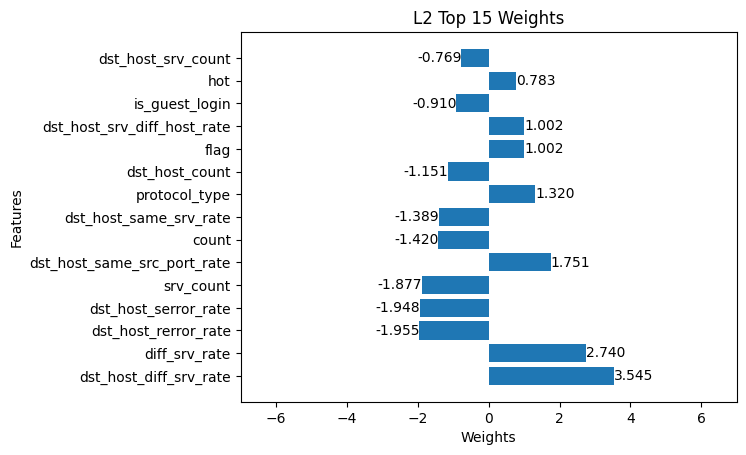

    Original weights  Absolute Weights                     features
34          3.545094          3.545094       dst_host_diff_srv_rate
29          2.740063          2.740063                diff_srv_rate
39         -1.954568          1.954568         dst_host_rerror_rate
37         -1.948123          1.948123         dst_host_serror_rate
23         -1.876759          1.876759                    srv_count
35          1.750671          1.750671  dst_host_same_src_port_rate
22         -1.419526          1.419526                        count
33         -1.388746          1.388746       dst_host_same_srv_rate
1           1.319580          1.319580                protocol_type
31         -1.151354          1.151354               dst_host_count
3           1.001655          1.001655                         flag
36          1.001535          1.001535  dst_host_srv_diff_host_rate
21         -0.909725          0.909725               is_guest_login
9           0.782535          0.782535          

In [15]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std = RUS_method_2()
accuracy1, labels1, coeff1 = logr1(X_train, X_test, y_train, y_test, X_train_std, X_test_std, solver_type='liblinear')
accuracy2, labels2, coeff2 = logr2(X_train, X_test, y_train, y_test, X_train_std, X_test_std, solver_type='liblinear')

accuracy = accuracy1 + accuracy2
labels = labels1 + labels2
accuracy_graph(labels,accuracy, "L1/L2 Comparison")

find_weights(coeff1, X_train.columns,"L1 Top 15 Weights", -7, 7)
find_weights(coeff2, X_train.columns,"L2 Top 15 Weights", -7, 7)

## Comparing L2 Regularization Strengths 

###### **Current Configuration**
1. Random Undersampling on with the "majority" attribute for X and y
2. liblinear Solver
3. C value ranges from 0.001 to 100

**Training Results**
As the value of C increased from 0.001 to 0.1, the accuracy of the model gradually increased from ~0.6604 to 0.7479. The accuracy of the model began to gradually decrease once C > 0.1. This is because L2 heavily relies on weights. As we increase the value of C, it has more of an impact on our results (for better and for worse).

**Testing Results**
The test results stayed aroun 0.99 with slight variations

C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\payge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


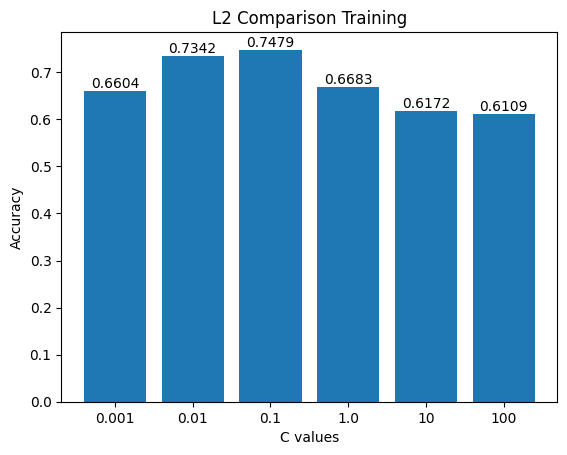

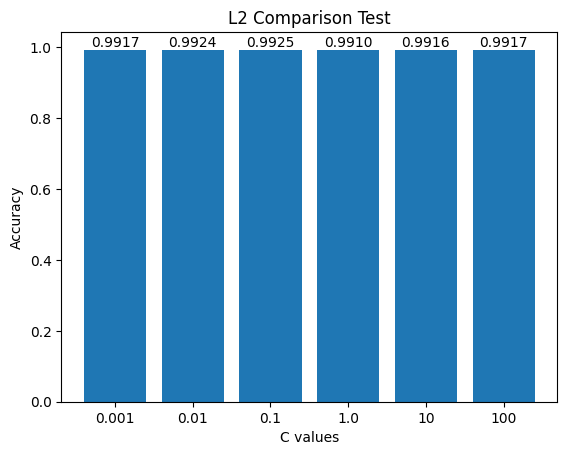

In [16]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std = RUS_method_2()


c = [0.001, 0.01, 0.1, 1.0, 10, 100] 
L2_data = [] # training values
L2_data1 = [] # test values
L2_labels = []
for i in c:
    labels = []
    accuracy = []
    c_val = i
    labels = f"{c_val}"

    accuracy2, labels2, coeff2 = logr2(X_train, X_test, y_train, y_test, X_train_std, X_test_std, c_val, solver_type='liblinear')
    L2_data.append(accuracy2[0])
    L2_data1.append(accuracy2[1])
    L2_labels.append(labels)

accuracy_graph2(L2_labels, L2_data, 'L2 Comparison Training')
accuracy_graph2(L2_labels, L2_data1, 'L2 Comparison Test')